## 1.Подготовка данных

In [2]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D



%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [3]:
#чтение данных
df=pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [4]:
print(df.shape)
print(df.dtypes)

(17966, 9)
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [5]:
# отбор числовых колонок
df_numeric=df.select_dtypes(include=[np.number])
numeric_cols=df_numeric.columns.values
print(numeric_cols)

['year' 'price' 'mileage' 'tax' 'mpg' 'engineSize']


In [6]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['model' 'transmission' 'fuelType']


## 2.Удаление дублирующихся строк

In [7]:
df=df.drop_duplicates()
df.shape

(17812, 9)

## 3.Отсутствующие данные

### 3.1 Количество пропущенных значений

In [8]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### 3.2 Тепловая карта пропущенных значений

<AxesSubplot:>

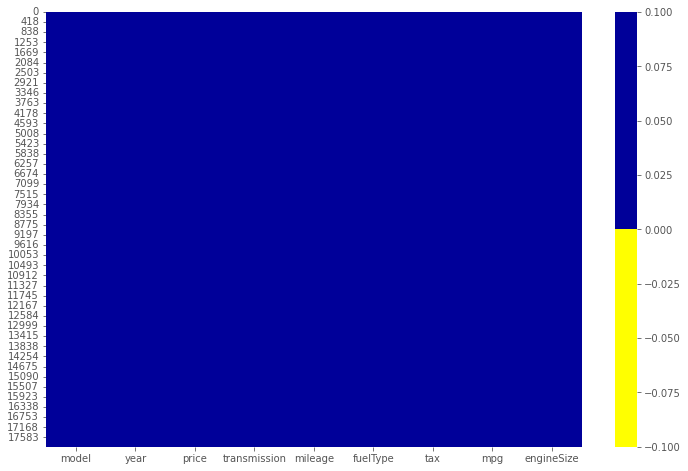

In [9]:

cols=df.columns[:30]#первые 30 колонок
#желтый-пропущенные данные,синий-не пропущенные
colours=['#ffff00','#000099']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

### 3.3 Процентный список пропущенных данных

In [10]:
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

model-0%
year-0%
price-0%
transmission-0%
mileage-0%
fuelType-0%
tax-0%
mpg-0%
engineSize-0%


## 4.Выбросы

### 4.1 Визуализация на boxplot

In [11]:
df=df[df.year<2020]

<AxesSubplot:>

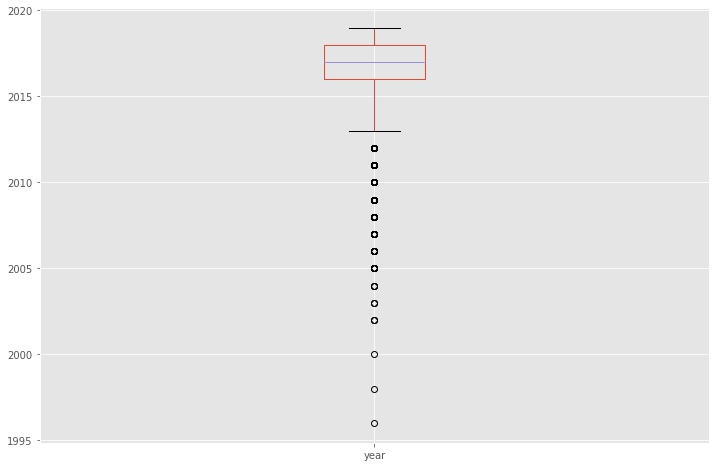

In [12]:
df.boxplot(column=['year'])

### 4.2 Визуализация на гистограмме

<AxesSubplot:>

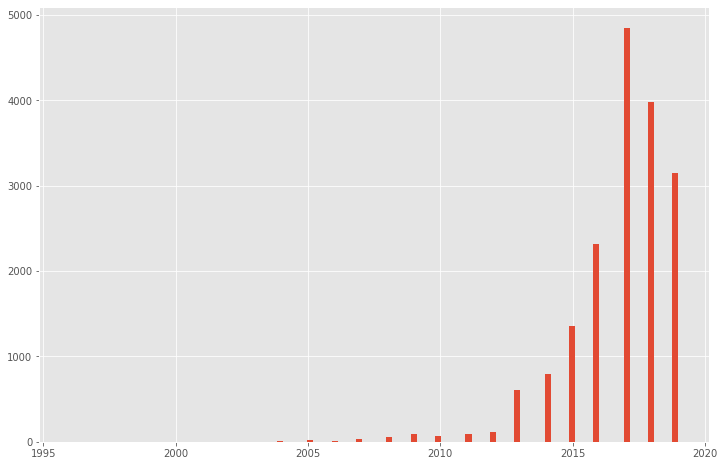

In [13]:
df['year'].hist(bins=100)

### 4.3 Описательная статистика

In [14]:
df['year'].describe()

count    17559.000000
mean      2016.814910
std          2.005495
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

## 5.Неинформативные признаки

In [15]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.15:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

model: 36.58523%
 Fiesta                   6424
 Focus                    4501
 Kuga                     2200
 EcoSport                 1101
 C-MAX                     542
 Ka+                       522
 Mondeo                    496
 B-MAX                     350
 S-MAX                     289
 Grand C-MAX               247
 Galaxy                    227
 Edge                      205
 KA                        197
 Tourneo Custom             69
 Grand Tourneo Connect      56
 Mustang                    46
 Puma                       34
 Tourneo Connect            31
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

year: 27.64394%
2017    4854
2018    3982
2019    3152
2016    2314
2015    1355
2014     799
2013     606
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      16
2006      13
2

## 6.Разные регистры символов

In [16]:
df['model'].value_counts(dropna=False)

 Fiesta                   6424
 Focus                    4501
 Kuga                     2200
 EcoSport                 1101
 C-MAX                     542
 Ka+                       522
 Mondeo                    496
 B-MAX                     350
 S-MAX                     289
 Grand C-MAX               247
 Galaxy                    227
 Edge                      205
 KA                        197
 Tourneo Custom             69
 Grand Tourneo Connect      56
 Mustang                    46
 Puma                       34
 Tourneo Connect            31
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

Тут видно, что один "focus" выбивается из общего списка, из-за пробелов в начале названия модели

In [17]:
# пусть все будет в нижнем регистре
df['model'] = df['model'].str.lower()
df['model'].value_counts(dropna=False)

 fiesta                   6424
 focus                    4501
 kuga                     2200
 ecosport                 1101
 c-max                     542
 ka+                       522
 mondeo                    496
 b-max                     350
 s-max                     289
 grand c-max               247
 galaxy                    227
 edge                      205
 ka                        197
 tourneo custom             69
 grand tourneo connect      56
 mustang                    46
 puma                       34
 tourneo connect            31
 fusion                     16
 streetka                    2
 ranger                      1
 escort                      1
 transit tourneo             1
focus                        1
Name: model, dtype: int64

Теперь все пробелы,и другие ненужные знаки, в данных убраны и подобных выпадающих значений, как "focus" без пробела, теперь нету

In [18]:
for i in non_numeric_cols:
  df[f'{i}']=df[i].str.strip('123.!? \n\t')
  df[f'{i}'] = df[f'{i}'].str.lower()
  df[f'{i}'].value_counts(dropna=False)
  df[i]=df[f'{i}']

In [19]:
df['model'].value_counts(dropna=False)

fiesta                   6424
focus                    4502
kuga                     2200
ecosport                 1101
c-max                     542
ka+                       522
mondeo                    496
b-max                     350
s-max                     289
grand c-max               247
galaxy                    227
edge                      205
ka                        197
tourneo custom             69
grand tourneo connect      56
mustang                    46
puma                       34
tourneo connect            31
fusion                     16
streetka                    2
ranger                      1
escort                      1
transit tourneo             1
Name: model, dtype: int64

In [20]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,fiesta,2017,12000,automatic,15944,petrol,150,57.7,1.0
1,focus,2018,14000,manual,9083,petrol,150,57.7,1.0
2,focus,2017,13000,manual,12456,petrol,150,57.7,1.0
3,fiesta,2019,17500,manual,10460,petrol,145,40.3,1.5
4,fiesta,2019,16500,automatic,1482,petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,b-max,2017,8999,manual,16700,petrol,150,47.1,1.4
17962,b-max,2014,7499,manual,40700,petrol,30,57.7,1.0
17963,focus,2015,9999,manual,7010,diesel,20,67.3,1.6
17964,ka,2018,8299,manual,5007,petrol,145,57.7,1.2


In [21]:
df.columns=df.columns.str.lower()

In [22]:
df

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,fiesta,2017,12000,automatic,15944,petrol,150,57.7,1.0
1,focus,2018,14000,manual,9083,petrol,150,57.7,1.0
2,focus,2017,13000,manual,12456,petrol,150,57.7,1.0
3,fiesta,2019,17500,manual,10460,petrol,145,40.3,1.5
4,fiesta,2019,16500,automatic,1482,petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,b-max,2017,8999,manual,16700,petrol,150,47.1,1.4
17962,b-max,2014,7499,manual,40700,petrol,30,57.7,1.0
17963,focus,2015,9999,manual,7010,diesel,20,67.3,1.6
17964,ka,2018,8299,manual,5007,petrol,145,57.7,1.2


После того как данные приведены в примерный порядок, можно строить кластеризацию

## 7.K-means и метод elbow.

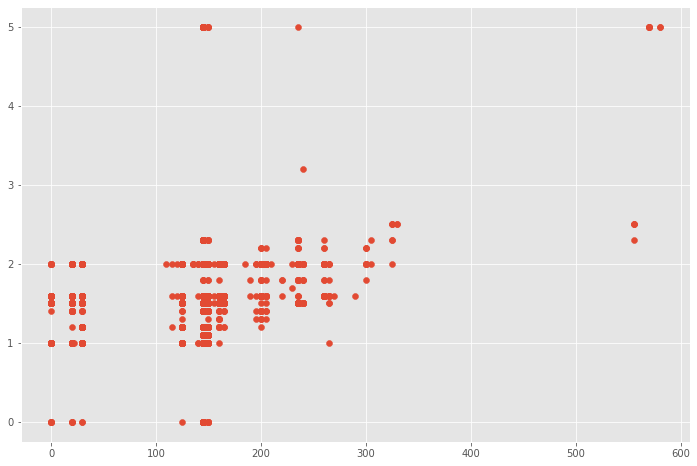

In [23]:
plt.scatter(df.tax,df.enginesize)

In [24]:
km=KMeans(n_clusters=3)

In [25]:
y_predicted=km.fit_predict(df[['tax','enginesize']])
# print(*y_predicted)

In [26]:
df['cluster']=y_predicted
df.head()

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,cluster
0,fiesta,2017,12000,automatic,15944,petrol,150,57.7,1.0,0
1,focus,2018,14000,manual,9083,petrol,150,57.7,1.0,0
2,focus,2017,13000,manual,12456,petrol,150,57.7,1.0,0
3,fiesta,2019,17500,manual,10460,petrol,145,40.3,1.5,0
4,fiesta,2019,16500,automatic,1482,petrol,145,48.7,1.0,0


In [27]:
km.cluster_centers_

array([[144.10030566,   1.35707046],
       [ 13.31915826,   1.26473038],
       [228.74336283,   1.90283186]])

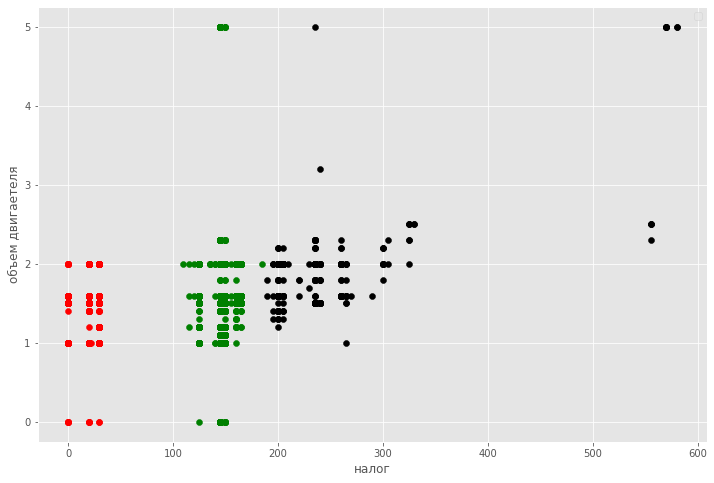

In [28]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.tax,df1.enginesize,color='green')
plt.scatter(df2.tax,df2.enginesize,color='red')
plt.scatter(df3.tax,df3.enginesize,color='black')

# plt.scatter(km.cluster_centres_[:,0],km.cluster_centers_[:,1],color='purple',maker='*',label='центроид')
plt.xlabel('налог')
plt.ylabel('объем двигаетеля')
plt.legend()

In [29]:
scaler=MinMaxScaler()
scaler.fit(df[['tax']])
df['tax']=scaler.transform(df[['tax']])
scaler.fit(df[['enginesize']])
df.enginesize=scaler.transform(df[['enginesize']])
df

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,cluster
0,fiesta,2017,12000,automatic,15944,petrol,0.258621,57.7,0.20,0
1,focus,2018,14000,manual,9083,petrol,0.258621,57.7,0.20,0
2,focus,2017,13000,manual,12456,petrol,0.258621,57.7,0.20,0
3,fiesta,2019,17500,manual,10460,petrol,0.250000,40.3,0.30,0
4,fiesta,2019,16500,automatic,1482,petrol,0.250000,48.7,0.20,0
...,...,...,...,...,...,...,...,...,...,...
17961,b-max,2017,8999,manual,16700,petrol,0.258621,47.1,0.28,0
17962,b-max,2014,7499,manual,40700,petrol,0.051724,57.7,0.20,1
17963,focus,2015,9999,manual,7010,diesel,0.034483,67.3,0.32,1
17964,ka,2018,8299,manual,5007,petrol,0.250000,57.7,0.24,0


In [30]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['tax','enginesize']])
y_predicted

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [31]:
df['cluster']=y_predicted
# df.drop('cluter',axis='columns',inplace=True)
df

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,cluster
0,fiesta,2017,12000,automatic,15944,petrol,0.258621,57.7,0.20,0
1,focus,2018,14000,manual,9083,petrol,0.258621,57.7,0.20,0
2,focus,2017,13000,manual,12456,petrol,0.258621,57.7,0.20,0
3,fiesta,2019,17500,manual,10460,petrol,0.250000,40.3,0.30,2
4,fiesta,2019,16500,automatic,1482,petrol,0.250000,48.7,0.20,0
...,...,...,...,...,...,...,...,...,...,...
17961,b-max,2017,8999,manual,16700,petrol,0.258621,47.1,0.28,0
17962,b-max,2014,7499,manual,40700,petrol,0.051724,57.7,0.20,1
17963,focus,2015,9999,manual,7010,diesel,0.034483,67.3,0.32,1
17964,ka,2018,8299,manual,5007,petrol,0.250000,57.7,0.24,0


In [32]:
#на графике выше были явно видны выбросы, поэтому я решил их убрать
df=df[(df.tax<0.8) & (df.enginesize<0.8)]
# df=df[(df.tax<0) & (df.enginesize==0)]

In [33]:
km.cluster_centers_

array([[0.24770331, 0.20780427],
       [0.02296407, 0.25294608],
       [0.2635246 , 0.36034684]])

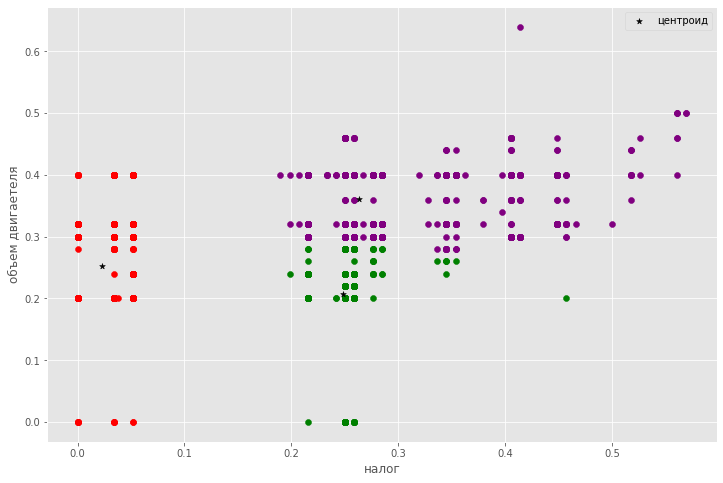

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.tax,df1.enginesize,color='green')
plt.scatter(df2.tax,df2.enginesize,color='red')
plt.scatter(df3.tax,df3.enginesize,color='purple')

# plt.scatter(km.cluster_centres_[:,0],km.cluster_centers_[:,1],color='purple',maker='*',label='центроид')
plt.xlabel('налог')
plt.ylabel('объем двигаетеля')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='центроид')
plt.legend()

In [35]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['tax','enginesize']])
  sse.append(km.inertia_)

In [36]:
sse

[302.59900809430326,
 120.81895353611444,
 49.684075442451025,
 35.800893762334226,
 21.961322415591052,
 14.26998176195433,
 12.61805826047099,
 10.199967780541398,
 8.844057847175215]

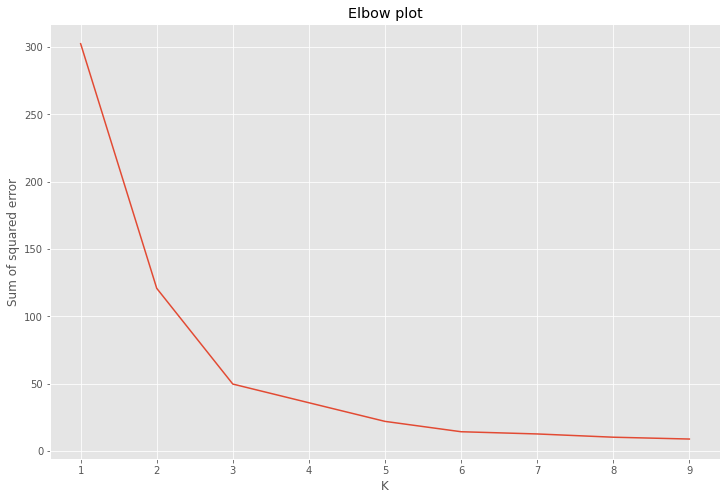

In [37]:
#поздно, конечно, показал, на методе локтя, сколько надо брать кластеров, но я угадал.
#на графике видно, что надо было брать 3 кластера
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow plot')
plt.plot(k_rng,sse)

In [38]:
df

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,cluster
0,fiesta,2017,12000,automatic,15944,petrol,0.258621,57.7,0.20,0
1,focus,2018,14000,manual,9083,petrol,0.258621,57.7,0.20,0
2,focus,2017,13000,manual,12456,petrol,0.258621,57.7,0.20,0
3,fiesta,2019,17500,manual,10460,petrol,0.250000,40.3,0.30,2
4,fiesta,2019,16500,automatic,1482,petrol,0.250000,48.7,0.20,0
...,...,...,...,...,...,...,...,...,...,...
17961,b-max,2017,8999,manual,16700,petrol,0.258621,47.1,0.28,0
17962,b-max,2014,7499,manual,40700,petrol,0.051724,57.7,0.20,1
17963,focus,2015,9999,manual,7010,diesel,0.034483,67.3,0.32,1
17964,ka,2018,8299,manual,5007,petrol,0.250000,57.7,0.24,0


## 8.DBSCAN

In [40]:
df_dbscan=df.iloc[:,[6,8]].values
df_dbscan

array([[0.25862069, 0.2       ],
       [0.25862069, 0.2       ],
       [0.25862069, 0.2       ],
       ...,
       [0.03448276, 0.32      ],
       [0.25      , 0.24      ],
       [0.03793103, 0.2       ]])

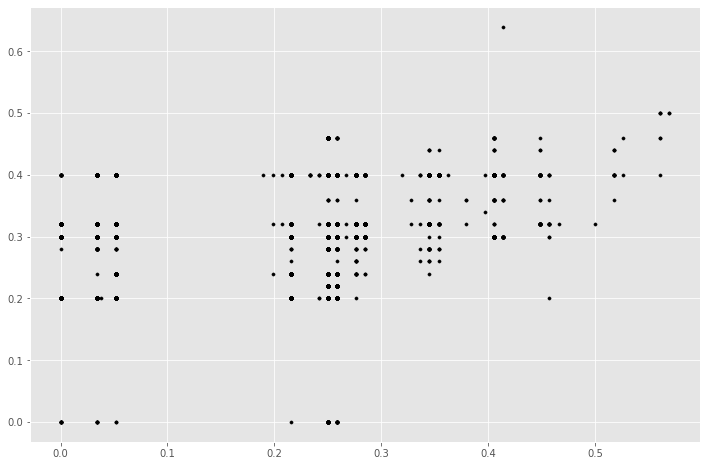

In [41]:
plt.scatter(df_dbscan[:,0],df_dbscan[:,1],s=10,c="black")
plt.show()

### вычисление наилучшего эпсилона для dbscan

In [42]:
clustering=DBSCAN(eps=0.11,min_samples=2).fit(df_dbscan)

clustering.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [43]:
samples=[df['tax'],df['enginesize']]
neigh=NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [44]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(df_dbscan)
distances,indices=nbrs.kneighbors(df_dbscan)

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.         0.04      ]
 [0.         0.1       ]
 [0.         0.18020632]]


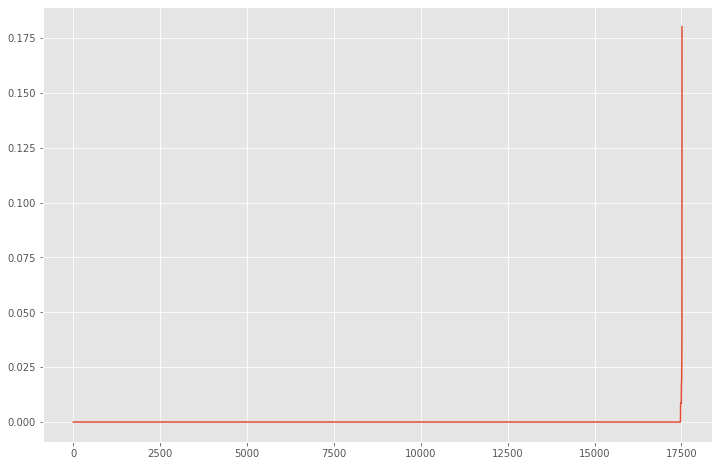

In [45]:
distances=np.sort(distances,axis=0)
print(distances)
distances=distances[:,1]
plt.plot(distances)

на графике примерно видно(очень плохо видно :) ), что эпсилон должен быть чуть меньше чем 0.0125

In [46]:
clusters=clustering.labels_

In [47]:
silhouette_score(df_dbscan,clusters)

0.6052955387081331

Оценка довольно высока и подтверждает показатель на графике

In [48]:
labels=clustering.fit_predict(df_dbscan)
np.unique(labels)

array([-1,  0,  1,  2,  3])

In [49]:
df_dbscan=np.array(df_dbscan)

Визуализация кластеров

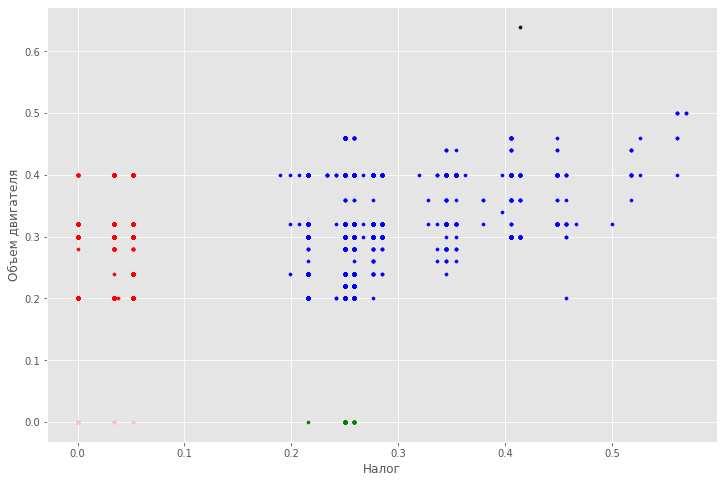

In [50]:
plt.scatter(df_dbscan[labels==-1,0],df_dbscan[labels==-1,1],s=10,c='black')
plt.scatter(df_dbscan[labels==0,0],df_dbscan[labels==0,1],s=10,c='blue')
plt.scatter(df_dbscan[labels==1,0],df_dbscan[labels==1,1],s=10,c='red')
plt.scatter(df_dbscan[labels==2,0],df_dbscan[labels==2,1],s=10,c='green')
plt.scatter(df_dbscan[labels==3,0],df_dbscan[labels==3,1],s=10,c='pink')

plt.xlabel('Налог')
plt.ylabel('Объем двигателя')
plt.show()

In [51]:
df

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,cluster
0,fiesta,2017,12000,automatic,15944,petrol,0.258621,57.7,0.20,0
1,focus,2018,14000,manual,9083,petrol,0.258621,57.7,0.20,0
2,focus,2017,13000,manual,12456,petrol,0.258621,57.7,0.20,0
3,fiesta,2019,17500,manual,10460,petrol,0.250000,40.3,0.30,2
4,fiesta,2019,16500,automatic,1482,petrol,0.250000,48.7,0.20,0
...,...,...,...,...,...,...,...,...,...,...
17961,b-max,2017,8999,manual,16700,petrol,0.258621,47.1,0.28,0
17962,b-max,2014,7499,manual,40700,petrol,0.051724,57.7,0.20,1
17963,focus,2015,9999,manual,7010,diesel,0.034483,67.3,0.32,1
17964,ka,2018,8299,manual,5007,petrol,0.250000,57.7,0.24,0


In [56]:
scaler.fit(df[['year']])
df.year=scaler.transform(df[['year']])

## 9.3D визуализация 

###3D визуализация k-means

In [ ]:
pip install ipympl 

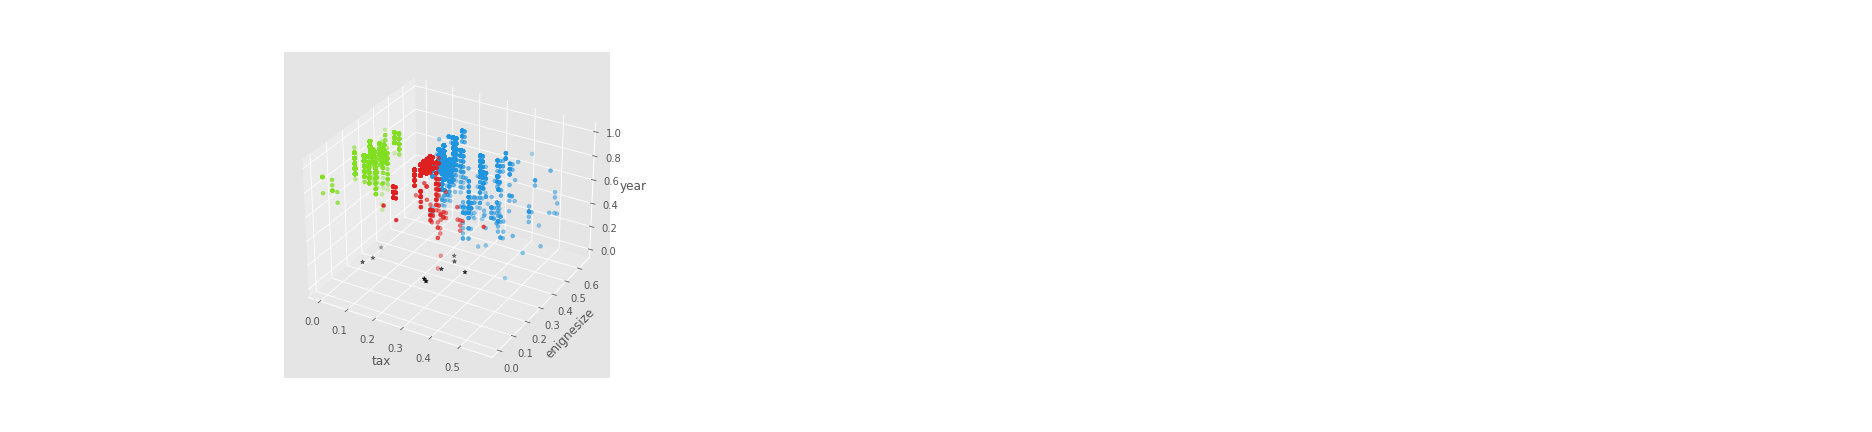

In [57]:
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget

colors = ['#DF2020', '#81DF20', '#2095DF']
df['clusters'] = km.fit_predict(df[['tax', 'enginesize','year']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.tax, df.enginesize,df.year, c=df.c, s=15)
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='центроид')
ax.set_xlabel('tax')
ax.set_ylabel('enignesize')
ax.set_zlabel('year')
plt.show()

###3D визуализация DBSCAN

In [53]:
# from google.colab import output
# output.enable_custom_widget_manager()
# %matplotlib widget

# colors = ['#DF2020', '#81DF20', '#2095DF']
# df['clusters'] = clustering.fit_predict(df[['tax', 'enginesize','year']])
# df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# fig = plt.figure(figsize=(26,6))
# ax = fig.add_subplot(131, projection='3d')
# ax.scatter(df.tax, df.enginesize,df.year, c=df.c, s=15)
# ax.set_xlabel('tax')
# ax.set_ylabel('enignesize')
# ax.set_zlabel('year')
# plt.show()

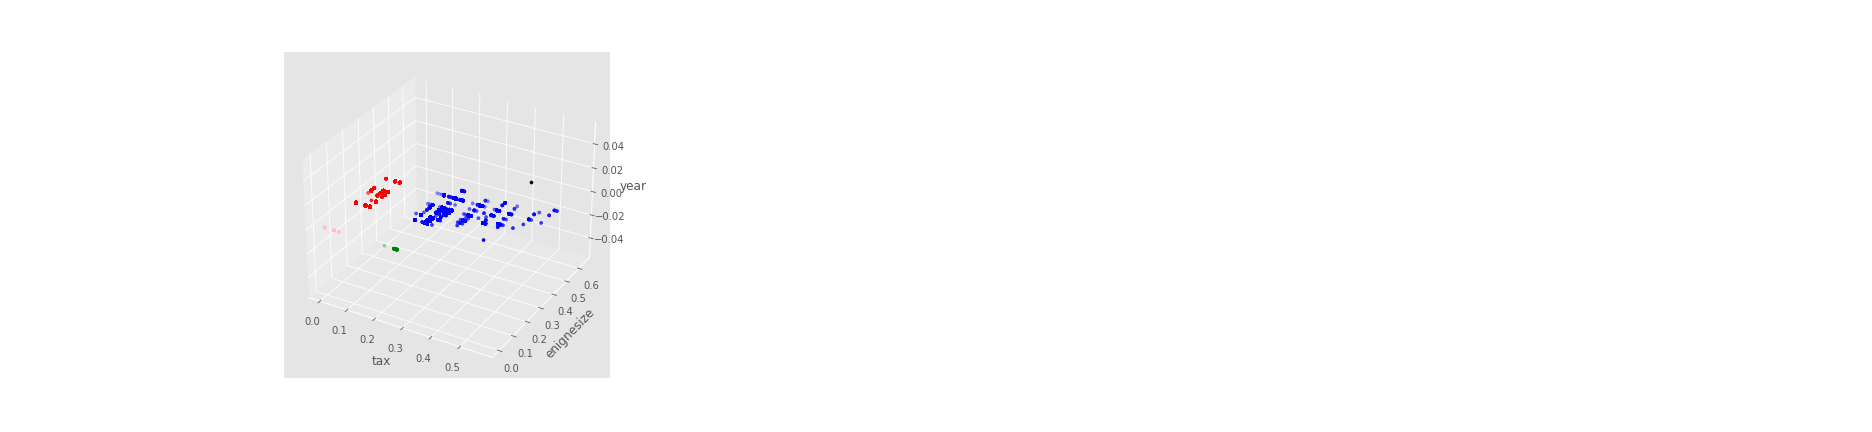

In [58]:
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget

colors = ['#DF2020', '#81DF20', '#2095DF']
df['clusters'] = clustering.fit_predict(df[['tax', 'enginesize','year']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
plt.scatter(df_dbscan[labels==-1,0],df_dbscan[labels==-1,1],s=10,c='black')
plt.scatter(df_dbscan[labels==0,0],df_dbscan[labels==0,1],s=10,c='blue')
plt.scatter(df_dbscan[labels==1,0],df_dbscan[labels==1,1],s=10,c='red')
plt.scatter(df_dbscan[labels==2,0],df_dbscan[labels==2,1],s=10,c='green')
plt.scatter(df_dbscan[labels==3,0],df_dbscan[labels==3,1],s=10,c='pink')
ax.set_xlabel('tax')
ax.set_ylabel('enignesize')
ax.set_zlabel('year')
plt.show()